<a href="https://colab.research.google.com/github/csabamedgyes/DL_HW2_RF8I8P/blob/main/medcsab_dl_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
My name is Csaba Medgyes (Neptun code: RF8I8P) and this is my second Homework for the Deep Learning class. Our excercies are:

In lab we constructed a neural network in Numpy. Construct the mini-batch based learning (with forward and backward steps). 

Upload it into a secret gist in github with the option of opening in colab!

From what I did different from the lab I am going to denote by the following so it is easier to review:

In [ ]:
#MODIFICATION START

##############################################################################################################################################################

    #lorem ipsum code

##############################################################################################################################################################

#MODIFICATION END

Import the necessary packages for later updates.

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing

### The given code from lab with modification between comment lines for mini batch based learning

In [2]:
# activációs függvény

def activation(x):

  return 1.0/(1.0 + np.exp(-x))

# derivative of the activation function

def dactivation(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

class MLP:
    
    def __init__(self, *args):
        """
        A hálózat inicializálása az argumentumként megadott méretek alapján.
        """
        # random seed megadása
        np.random.seed(123)
        # A hálózat formája (rétegek száma), amely megegyezik a paraméterek számával
        self.shape = args
        n = len(args)
        # Rétegek létrehozása
        self.layers = []
        # Bemeneti réteg létrehozása (+1 egység a BIAS-nak)
        self.layers.append(np.ones(self.shape[0]+1))
        # Rejtett réteg(ek) és a kimeneti réteg létrehozása
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))
        # Súlymátrix létrehozása
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                         self.layers[i+1].size)))
        # dw fogja tartalmazni a súlyok utolsó módosításait (később pl. a momentum módszer számára)
        self.dw = [0,]*len(self.weights)
        # Súlyok újrainicializálása
        self.reset()
    
    def reset(self):
        """
        Súlyok újrainicializálása [-1, 1) intervallum fölött vett egyenletes eloszlás mintavételezésével
        """
        for i in range(len(self.weights)):
            # véletlen számok [0,1) tartományban 
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            # átskálázzuk a súlyokat [-1,1) tartományba
            self.weights[i][...] = (2*Z-1)*1

    def propagate_forward(self, data):
        """
        A bemenő adatok végigküldése a hálózaton, kimeneti rétegig (forward propagation)
        """
        # Bemeneti réteg beállítása (tanító adatok)
        self.layers[0][0:-1] = data
        # Az adatok végigküldése a bemeneti rétegtől az utolsó előtti rétegig (az utolsó ugyanis a kimeneti réteg).
        # A szigmoid aktivációs függvény használatával, mátrixszorzások alkalmazásával.
        # Az előadáson a "layers" változót jelöltük "a"-val.
        for i in range(1,len(self.shape)):
            s_i = np.dot(self.layers[i-1], self.weights[i-1])
            self.layers[i][...] = activation(s_i)
        # Visszatérés a hálózat által becsült eredménnyel
        return self.layers[-1]

    def propagate_backward(self, target, lrate=0.1):
        """
        Hibavisszaterjesztés (backpropagation) definiálása. 
        Args:
            target: címkék, a kimenetek elvárt értékei
            lrate: 
                A a learning rate (tanulási ráta) paraméter befolyásolja, hogy a hálózat súlyait milyen
                mértékben módosítsuk a gradiens függvényében. Ha ez az érték túl magas, akkor a háló 
                "oszcillálhat" egy lokális vagy globális minimum körül. Ha túl kicsi értéket választunk,
                akkor pedig jelentősen több időbe telik mire elérjük a legjobb megoldást vagy leakad egy 
                lokális minimumban és sose éri el azt. Defaults to 0.1.

        Returns: az aktuális kimenetek és elvárt értékek alapján számított (négyzetes) hiba
        """
        deltas = []
        # Hiba: 1/2 (y-y_kalap)**2
        # Hiba deriváltjának kiszámítása a kimeneti rétegen (dC/dy_kalap)
        derror = -(target-self.layers[-1]) # y-y_kalap
        # error*dactivation(s(3))
        s_last = np.dot(self.layers[-2],self.weights[-1])
        delta_last = derror * dactivation(s_last)
        deltas.append(delta_last)
        # Gradiens kiszámítása a rejtett réteg(ek)ben
        for i in range(len(self.shape)-2,0,-1):
            s_i = np.dot(self.layers[i-1],self.weights[i-1])
            # pl. utolsó rejtett réteg: delta(3)*(W(2).T)*dactivation(s(2)) (lásd előadás)
            delta_i = np.dot(deltas[0],self.weights[i].T)*dactivation(s_i)
            # a háló eleje felé "lépkedünk, mindig a deltas tömb elejére szúrjuk be az aktuálisan kiszámítottat"
            deltas.insert(0,delta_i)            
        # Súlyok módosítása
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            # pl. utolsó rétegben: delta(3)*a(2) (lásd előadás)
            dw = -lrate*np.dot(layer.T,delta)
            # súlyok módosítása
            self.weights[i] += dw 

            # a súlymódosítás eltárolása
            self.dw[i] = dw

        # Visszatérés a hibával
        error = (target-self.layers[-1])**2 
        return error.sum()

    #MODIFICATION START

    ##############################################################################################################################################################

    def updating_weights(self, dws, batch_size=32):

        #We should update the weights with dws - the difference of weights

        for l in range(len(self.weights)):

            #We should divide by batch_size because we want to get the average of gradients (not the sum)

            dws[l] /= batch_size

            self.weights[l] += dws[l]
            
    def returning_self_weights(self):
        return self.weights
    
    def returning_self_dw(self):
        return self.dw

    ###############################################################################################################################################################

    #MODIFICATION END

In [5]:
def learn(network, X, Y, valid_split, test_split, epochs=20, lrate=0.1, batch_size = 32):

        # train-validation-test minták különválasztása
        nb_samples = len(Y)
        X_train = X[0:int(nb_samples*(1-valid_split-test_split))]
        Y_train = Y[0:int(nb_samples*(1-valid_split-test_split))]
        X_valid = X[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        Y_valid = Y[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        X_test  = X[int(nb_samples*(1-test_split)):]
        Y_test  = Y[int(nb_samples*(1-test_split)):]
    
        # standardizálás
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)
    
        # ugyanolyan sorrendben keverjük be a bemeneteket és kimeneteket, a három külön adatbázisra
        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]
        
#MODIFICATION START

##############################################################################################################################################################

      # In the training phase, we have to go through every batch in every epoch:

        for i in range(epochs):

            number_of_batches = X_train.shape[0] // batch_size

            # this is the training error in an epoch
            train_error_all = 0

            for j in range(number_of_batches):

                # training error during a batch
                train_error = 0

                # the difference of the weights:

                dws = np.zeros_like(network.returning_self_weights())

                # we have to check every sample of the batch

                for k in range(j * batch_size,(j+1) * batch_size):

                    network.propagate_forward( X_train[k] )

                    train_error += network.propagate_backward( Y_train[k], lrate )

                    #We should add the difference of weights of every sample to the whole difference of weights

                    for l in range(len(network.returning_self_weights())):

                        dws[l] += network.returning_self_dw()[l]

                network.updating_weights(dws, batch_size)

                train_error /= batch_size
                train_error_all += train_error

            train_error_all /= number_of_batches

##############################################################################################################################################################

#MODIFICATION END

            # validation phase (Same as in notebook)
            valid_err = 0
            o_valid = np.zeros(X_valid.shape[0])
            for k in range(X_valid.shape[0]):
                o_valid[k] = network.propagate_forward(X_valid[k])
                valid_err += (o_valid[k]-Y_valid[k])**2
            valid_err /= X_valid.shape[0]

            print("%d epoch, train_error: %.4f, valid_err: %.4f" % (i, train_error_all, valid_err))

        # Tesztelési fázis
        print("\n--- TESZTELÉS ---\n")
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
            o_test[k] = network.propagate_forward(X_test[k])
            test_err += (o_test[k]-Y_test[k])**2
            print(k, X_test[k], '%.2f' % o_test[k], ' (elvart eredmeny: %.2f)' % Y_test[k])
        test_err /= X_test.shape[0]

        plt.scatter(X_test[:,0], X_test[:,1], c=np.round(o_test[:]), cmap=plt.cm.coolwarm)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0 epoch, train_error: 0.2548, valid_err: 0.2455
1 epoch, train_error: 0.2423, valid_err: 0.2324
2 epoch, train_error: 0.2229, valid_err: 0.2075
3 epoch, train_error: 0.1886, valid_err: 0.1682
4 epoch, train_error: 0.1462, valid_err: 0.1290
5 epoch, train_error: 0.1120, valid_err: 0.1017
6 epoch, train_error: 0.0901, valid_err: 0.0846
7 epoch, train_error: 0.0767, valid_err: 0.0737
8 epoch, train_error: 0.0680, valid_err: 0.0661
9 epoch, train_error: 0.0619, valid_err: 0.0605
10 epoch, train_error: 0.0574, valid_err: 0.0561
11 epoch, train_error: 0.0539, valid_err: 0.0526
12 epoch, train_error: 0.0510, valid_err: 0.0497
13 epoch, train_error: 0.0485, valid_err: 0.0472
14 epoch, train_error: 0.0465, valid_err: 0.0451
15 epoch, train_error: 0.0447, valid_err: 0.0432
16 epoch, train_error: 0.0431, valid_err: 0.0416
17 epoch, train_error: 0.0417, valid_err: 0.0402
18 epoch, train_error: 0.0404, valid_err: 0.0389
19 epoch, train_error: 0.0393, valid_err: 0.0378
20 epoch, train_error: 0.0383,

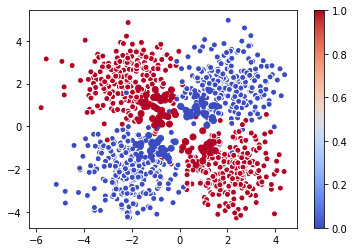

In [6]:
network = MLP(2,10,1)

#this is the same as in the second notebook of practice

# Tanító, validációs és teszt adatok megadása a rendszernek (zajjal terhelt XOR adatok)
def get_2d_normal(nb_samples, loc=[0,0], scale=1.0, label=0, X=None, Y=None):
        """ 
        2D normál eloszlás mintavételezésével generál pontokat a megadott középpont körül és állít elő címkéket tartalmazó tömböt hozzájuk.
        Ha X, Y-ban megadunk egy "adathalmazt" mely tartalmaz már pontokat, a generált pontokat konkatenálja a meglévőkhöz.
        """
        X_new = np.random.normal(loc, scale, (nb_samples, 2))
        Y_new = np.repeat(label, nb_samples)
        if X is not None and Y is not None:
            X_new = np.concatenate([X, X_new], axis=0)
            Y_new = np.concatenate([Y, Y_new], axis=0)
        return X_new, Y_new


def get_dataset(nb_samples=1000):
    X, Y = get_2d_normal(nb_samples//4, [2, 2],   label=0)
    X, Y = get_2d_normal(nb_samples//4, [-2, -2], label=0, X=X, Y=Y)
    X, Y = get_2d_normal(nb_samples//4, [2, -2],  label=1, X=X, Y=Y)
    X, Y = get_2d_normal(nb_samples//4, [-2, 2],  label=1, X=X, Y=Y)

    randperm = np.random.permutation(len(X))
    X, Y = X[randperm], Y[randperm]
    return X, Y



X,Y = get_dataset()

plt.scatter(X[:,0],X[:,1],c=Y[:], cmap=plt.cm.coolwarm, linewidth=1, edgecolors='w', vmin=0, vmax=1)
plt.colorbar();


network.reset()
valid_split = 0.2; test_split = 0.1
learn(network, X, Y, valid_split, test_split, batch_size=4, epochs=100)
